# Beyin Tümörü MRI Görüntülerini Gösterme

Bu notebook, veri setindeki her sınıftan örnek MRI görüntülerini göstermektedir.

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
from pathlib import Path
from matplotlib.gridspec import GridSpec

# Grafik stilini ayarlama
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 14

# Veri seti yolunu tanımlama
data_dir = Path('/Users/onurakyuz/Desktop/Brain Tumor MRI/data')

## Her Sınıftan Örnek Görüntüler

Eğitim setinden örnek görüntüler:


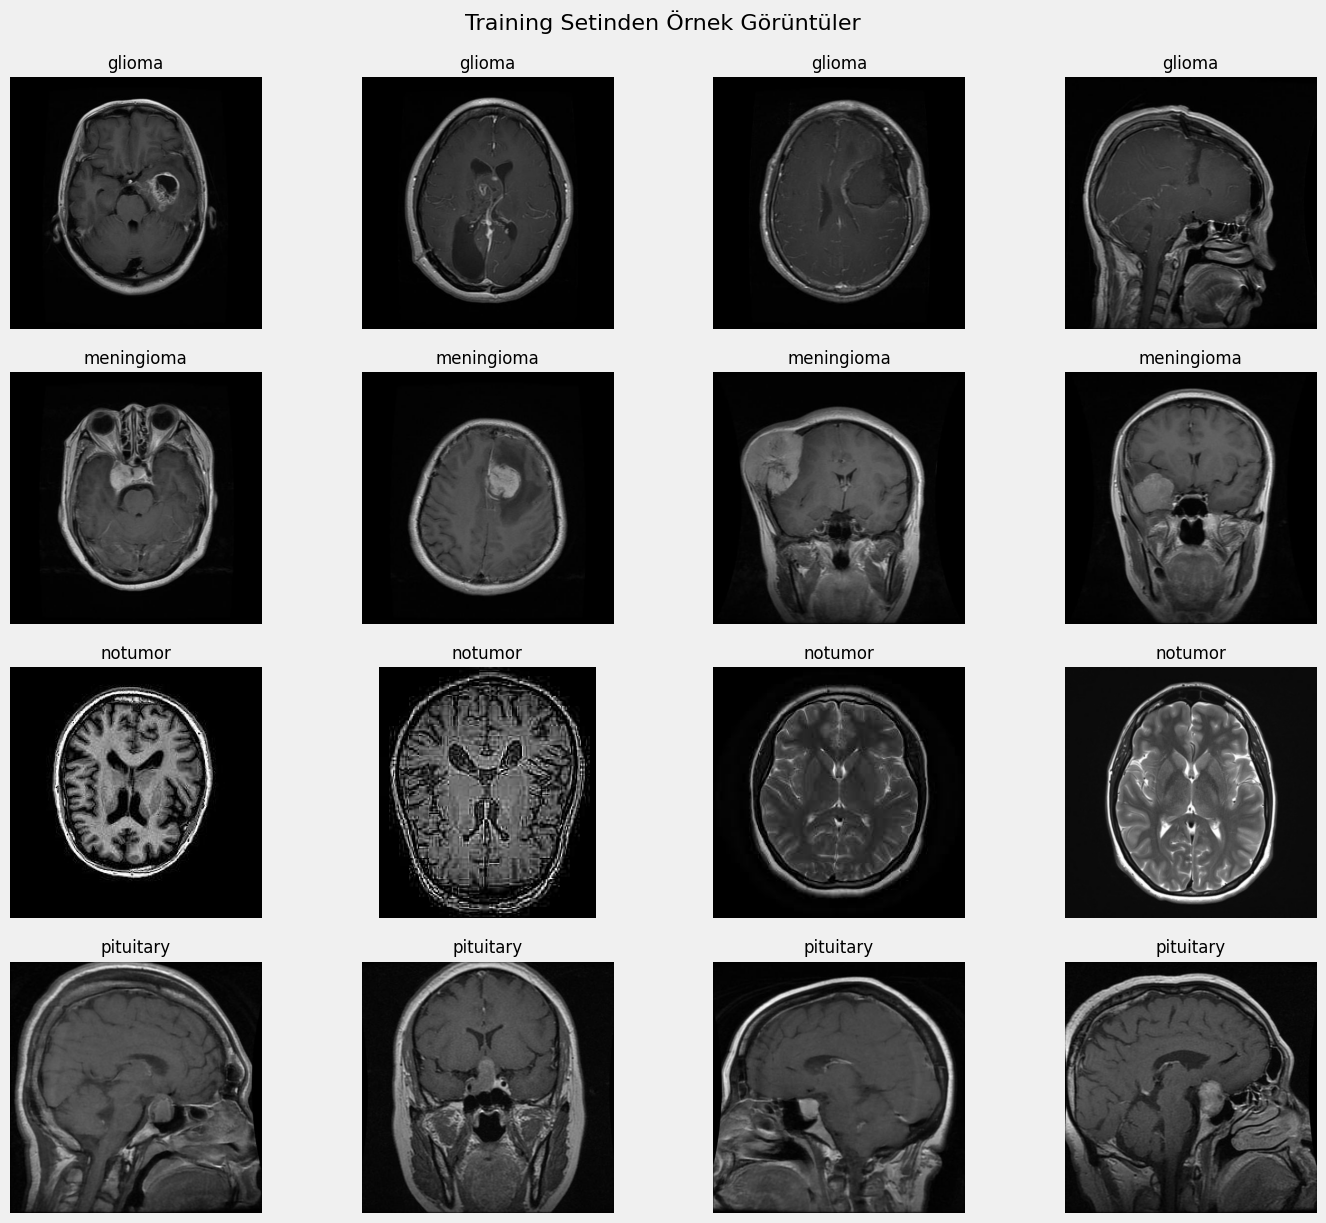

In [2]:
# Her sınıftan örnek görüntüleri gösterme fonksiyonu
def display_sample_images(data_dir, split='Training', num_samples=4):
    split_dir = data_dir / split
    class_dirs = sorted([d for d in split_dir.iterdir() if d.is_dir()])
    
    fig, axes = plt.subplots(len(class_dirs), num_samples, figsize=(15, 12))
    
    for i, class_dir in enumerate(class_dirs):
        class_name = class_dir.name
        image_paths = list(class_dir.glob('*.jpg'))
        
        # Rastgele görüntü seçme
        selected_images = random.sample(image_paths, min(num_samples, len(image_paths)))
        
        for j, img_path in enumerate(selected_images):
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye dönüştürme
            
            axes[i, j].imshow(img)
            axes[i, j].set_title(f'{class_name}', fontsize=12)
            axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f'{split} Setinden Örnek Görüntüler', fontsize=16, y=1.02)
    plt.show()

# Eğitim setinden örnek görüntüleri gösterme
print("Eğitim setinden örnek görüntüler:")
display_sample_images(data_dir, split='Training', num_samples=4)


Test setinden örnek görüntüler:


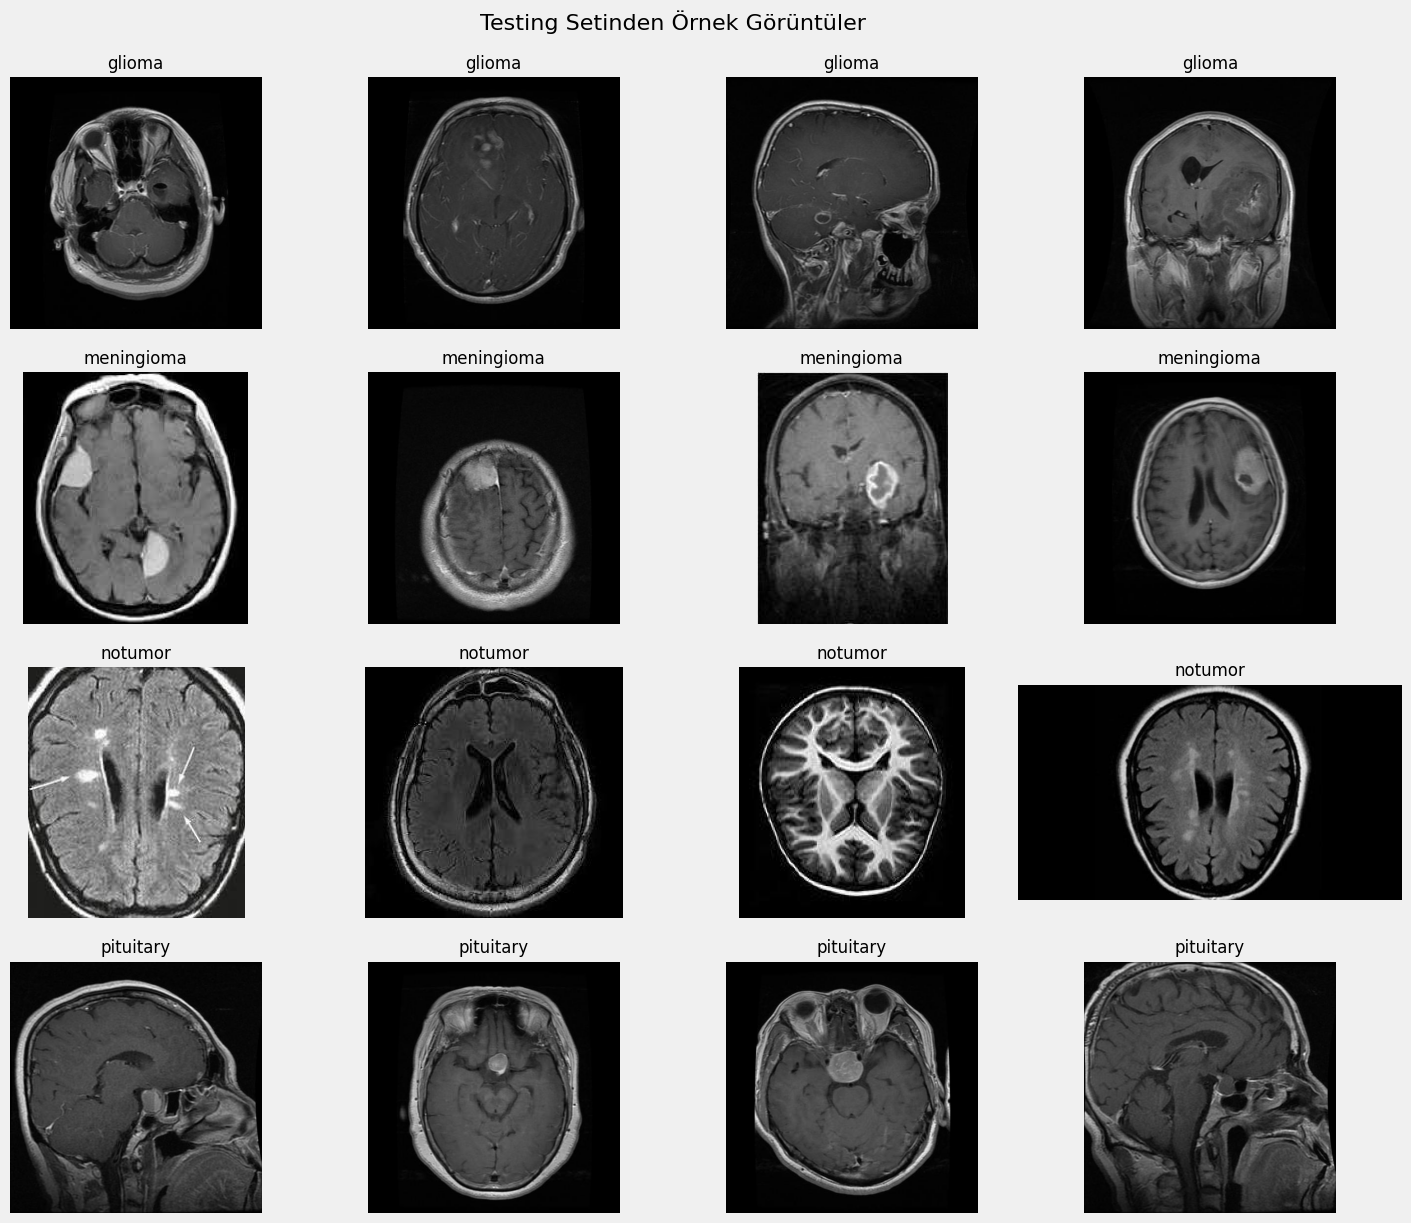

In [3]:
# Test setinden örnek görüntüleri gösterme
print("\nTest setinden örnek görüntüler:")
display_sample_images(data_dir, split='Testing', num_samples=4)

## Görüntü Özellikleri


Eğitim setinden görüntü özellikleri:


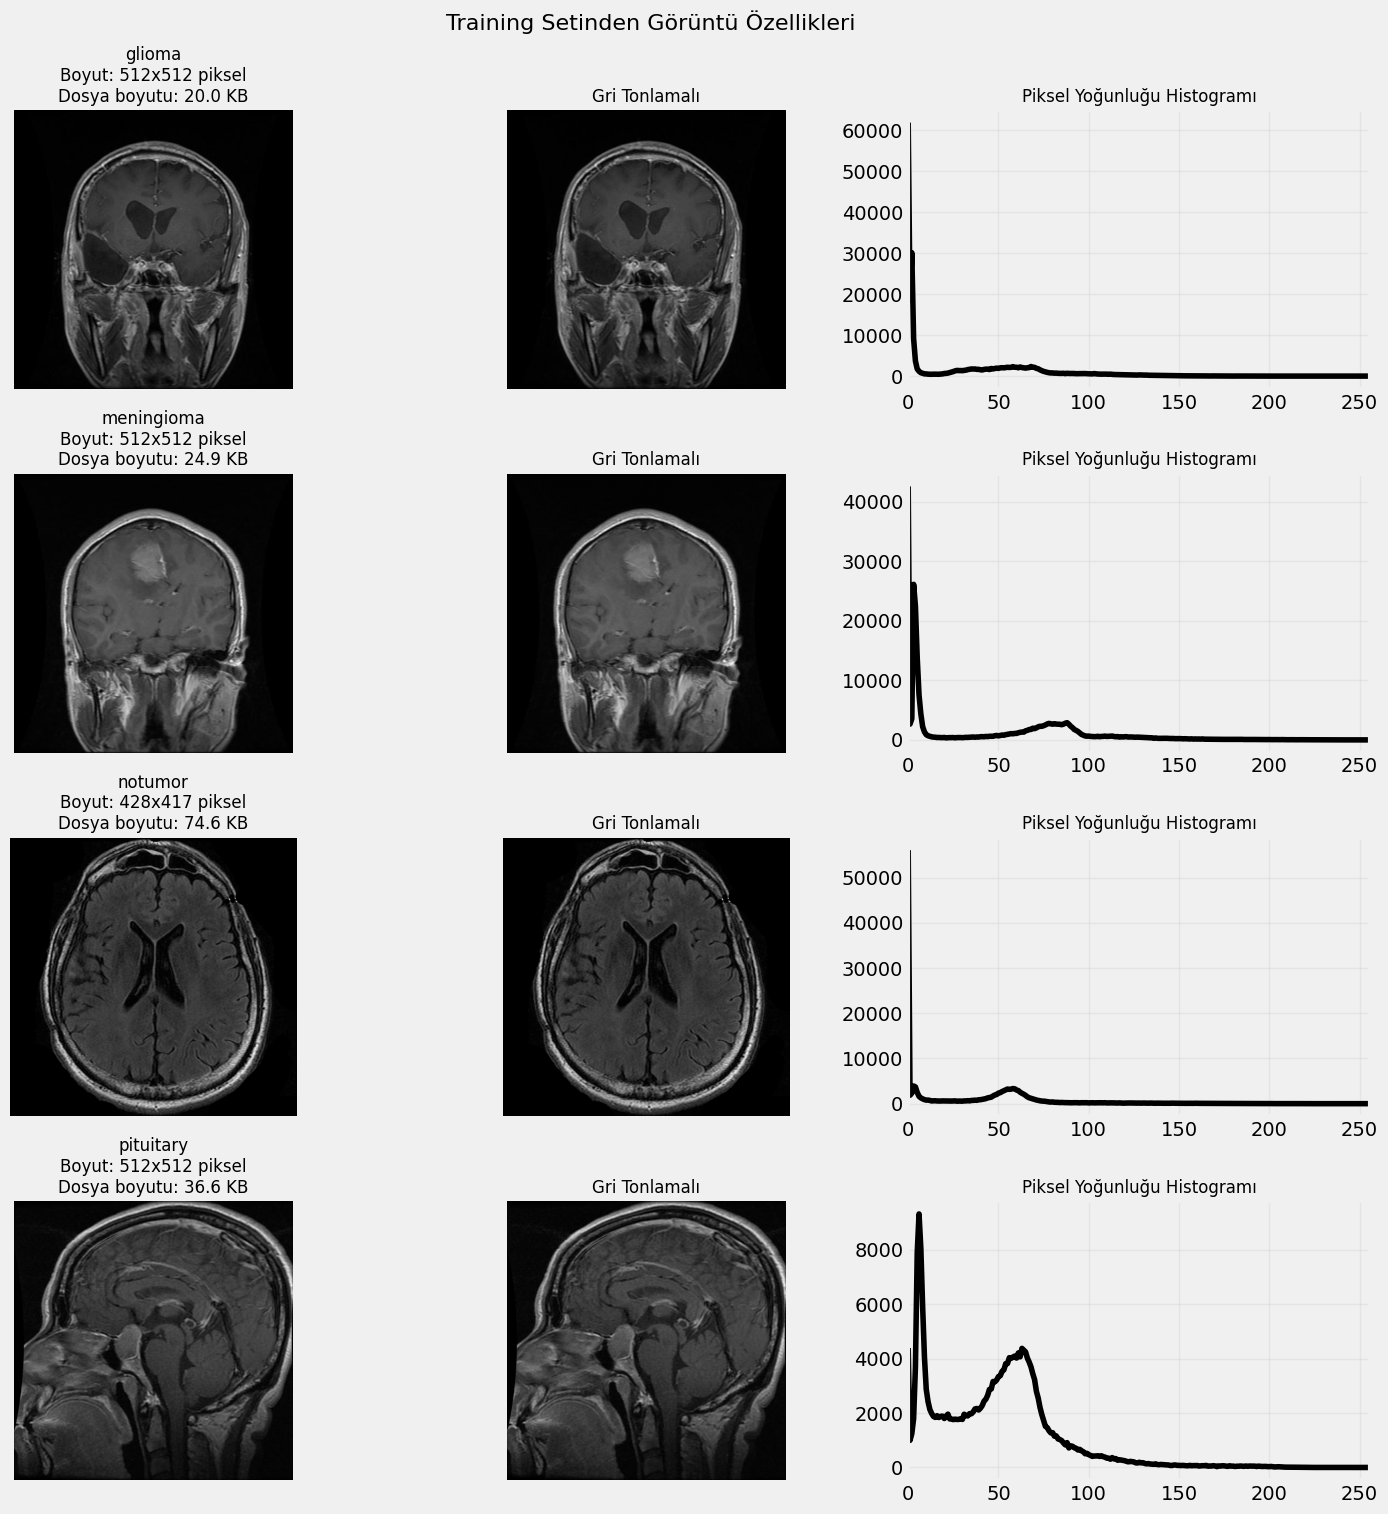

In [4]:
# Görüntü özelliklerini gösterme fonksiyonu
def display_image_properties(data_dir, split='Training'):
    split_dir = data_dir / split
    class_dirs = sorted([d for d in split_dir.iterdir() if d.is_dir()])
    
    # Her sınıftan bir görüntü seçme
    selected_images = []
    class_names = []
    
    for class_dir in class_dirs:
        class_name = class_dir.name
        image_paths = list(class_dir.glob('*.jpg'))
        selected_image = random.choice(image_paths)
        selected_images.append(selected_image)
        class_names.append(class_name)
    
    # Görüntü özelliklerini gösterme
    fig = plt.figure(figsize=(15, 15))
    gs = GridSpec(len(selected_images), 3, figure=fig)
    
    for i, (img_path, class_name) in enumerate(zip(selected_images, class_names)):
        # Görüntüyü okuma
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Görüntü boyutları ve özellikleri
        height, width, channels = img.shape
        file_size_kb = os.path.getsize(img_path) / 1024
        
        # Orijinal görüntü
        ax1 = fig.add_subplot(gs[i, 0])
        ax1.imshow(img)
        ax1.set_title(f'{class_name}\nBoyut: {width}x{height} piksel\nDosya boyutu: {file_size_kb:.1f} KB', fontsize=12)
        ax1.axis('off')
        
        # Gri tonlamalı görüntü
        ax2 = fig.add_subplot(gs[i, 1])
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ax2.imshow(img_gray, cmap='gray')
        ax2.set_title('Gri Tonlamalı', fontsize=12)
        ax2.axis('off')
        
        # Histogram
        ax3 = fig.add_subplot(gs[i, 2])
        hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
        ax3.plot(hist, color='black')
        ax3.set_xlim([0, 256])
        ax3.set_title('Piksel Yoğunluğu Histogramı', fontsize=12)
        ax3.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle(f'{split} Setinden Görüntü Özellikleri', fontsize=16, y=1.01)
    plt.show()

# Eğitim setinden görüntü özelliklerini gösterme
print("\nEğitim setinden görüntü özellikleri:")
display_image_properties(data_dir, split='Training')

## Veri Artırma Örnekleri


Veri artırma örnekleri:


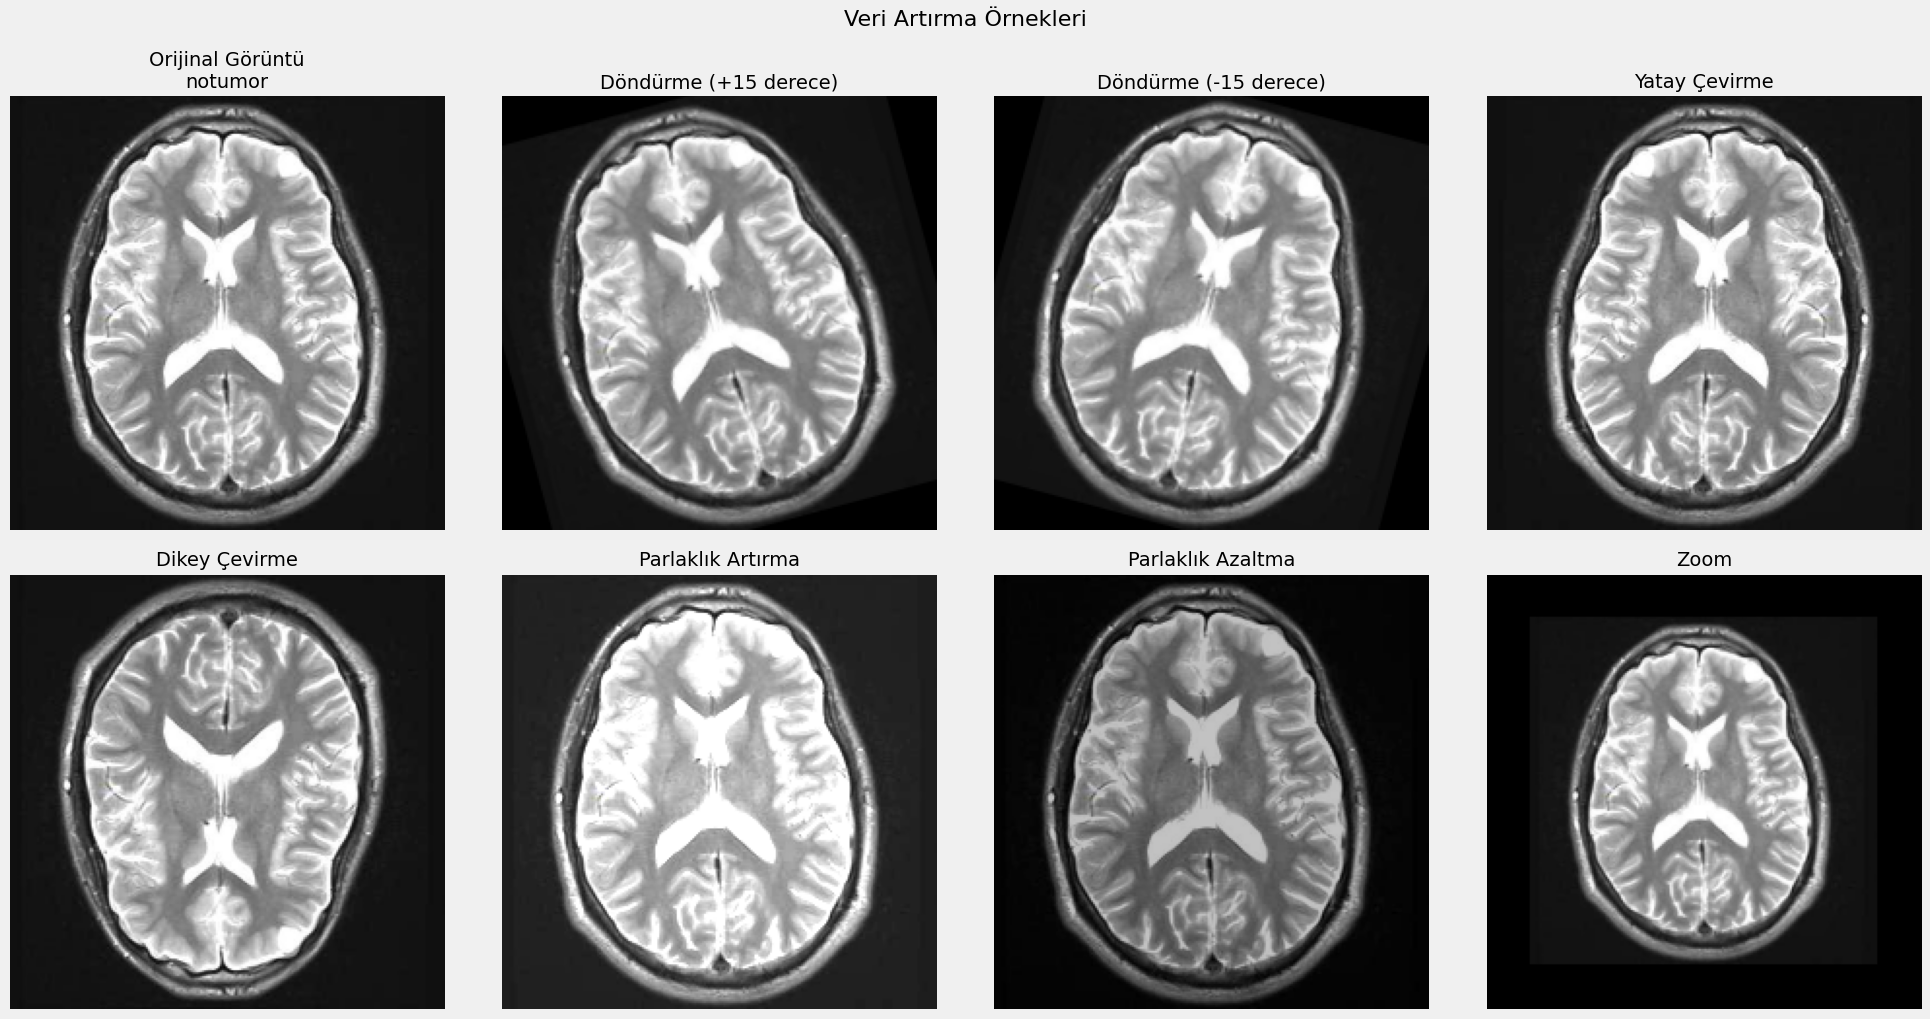

In [5]:
# Veri artırma örneklerini gösterme fonksiyonu
def display_data_augmentation_examples(data_dir, split='Training'):
    split_dir = data_dir / split
    class_dirs = sorted([d for d in split_dir.iterdir() if d.is_dir()])
    
    # Rastgele bir sınıf seçme
    class_dir = random.choice(class_dirs)
    class_name = class_dir.name
    
    # Rastgele bir görüntü seçme
    img_path = random.choice(list(class_dir.glob('*.jpg')))
    
    # Görüntüyü okuma
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Görüntüyü yeniden boyutlandırma
    img_resized = cv2.resize(img, (224, 224))
    
    # Veri artırma örnekleri
    # 1. Döndürme
    rows, cols = img_resized.shape[:2]
    M1 = cv2.getRotationMatrix2D((cols/2, rows/2), 15, 1)
    img_rotated_15 = cv2.warpAffine(img_resized, M1, (cols, rows))
    
    M2 = cv2.getRotationMatrix2D((cols/2, rows/2), -15, 1)
    img_rotated_neg15 = cv2.warpAffine(img_resized, M2, (cols, rows))
    
    # 2. Yatay çevirme
    img_flipped_h = cv2.flip(img_resized, 1)
    
    # 3. Dikey çevirme
    img_flipped_v = cv2.flip(img_resized, 0)
    
    # 4. Parlaklık ayarlama
    img_bright = cv2.convertScaleAbs(img_resized, alpha=1.2, beta=10)
    img_dark = cv2.convertScaleAbs(img_resized, alpha=0.8, beta=-10)
    
    # 5. Zoom
    zoom_factor = 0.8
    zoomed_h, zoomed_w = int(rows * zoom_factor), int(cols * zoom_factor)
    y_offset = (rows - zoomed_h) // 2
    x_offset = (cols - zoomed_w) // 2
    
    img_zoomed = cv2.resize(img_resized, (zoomed_w, zoomed_h))
    img_zoomed_padded = np.zeros_like(img_resized)
    img_zoomed_padded[y_offset:y_offset+zoomed_h, x_offset:x_offset+zoomed_w] = img_zoomed
    
    # Veri artırma örneklerini gösterme
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    # Orijinal görüntü
    axes[0, 0].imshow(img_resized)
    axes[0, 0].set_title(f'Orijinal Görüntü\n{class_name}', fontsize=14)
    axes[0, 0].axis('off')
    
    # Döndürülmüş görüntüler
    axes[0, 1].imshow(img_rotated_15)
    axes[0, 1].set_title('Döndürme (+15 derece)', fontsize=14)
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(img_rotated_neg15)
    axes[0, 2].set_title('Döndürme (-15 derece)', fontsize=14)
    axes[0, 2].axis('off')
    
    # Yatay çevrilmiş görüntü
    axes[0, 3].imshow(img_flipped_h)
    axes[0, 3].set_title('Yatay Çevirme', fontsize=14)
    axes[0, 3].axis('off')
    
    # Dikey çevrilmiş görüntü
    axes[1, 0].imshow(img_flipped_v)
    axes[1, 0].set_title('Dikey Çevirme', fontsize=14)
    axes[1, 0].axis('off')
    
    # Parlaklık ayarlanmış görüntüler
    axes[1, 1].imshow(img_bright)
    axes[1, 1].set_title('Parlaklık Artırma', fontsize=14)
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(img_dark)
    axes[1, 2].set_title('Parlaklık Azaltma', fontsize=14)
    axes[1, 2].axis('off')
    
    # Zoom yapılmış görüntü
    axes[1, 3].imshow(img_zoomed_padded)
    axes[1, 3].set_title('Zoom', fontsize=14)
    axes[1, 3].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Veri Artırma Örnekleri', fontsize=16, y=1.02)
    plt.show()

# Veri artırma örneklerini gösterme
print("\nVeri artırma örnekleri:")
display_data_augmentation_examples(data_dir, split='Training')

## Sınıflar Arası Karşılaştırma


Sınıflar arası karşılaştırma:


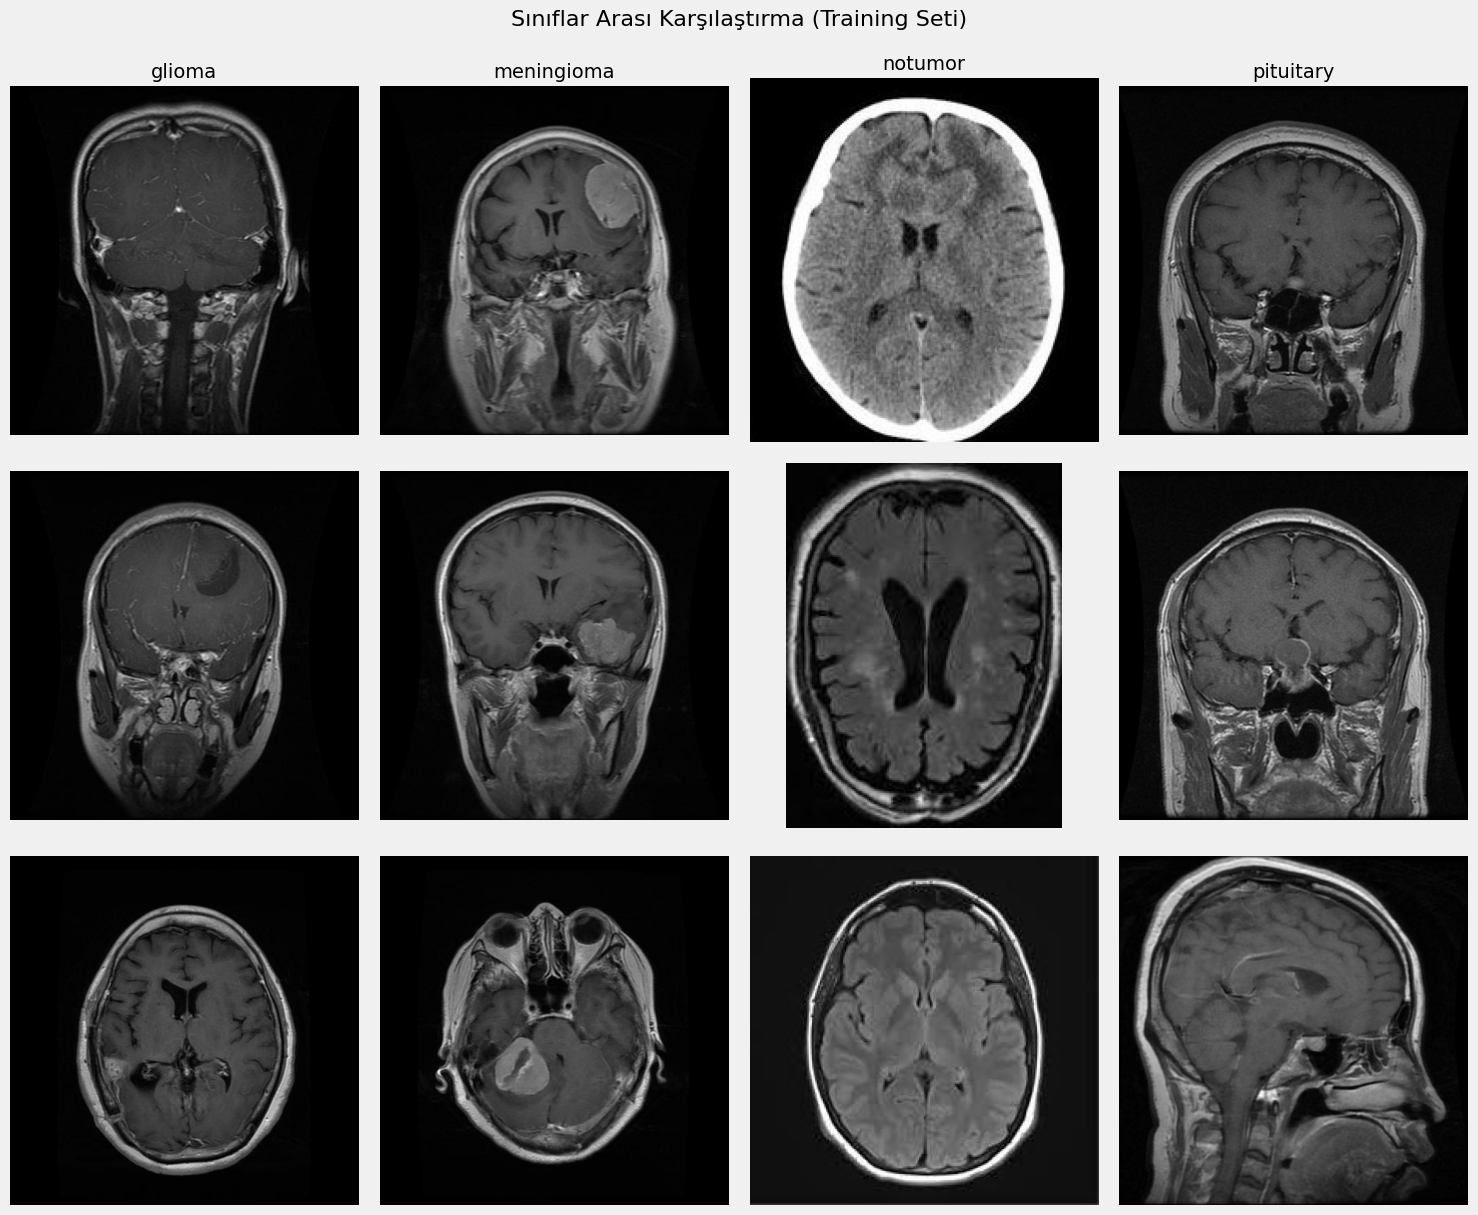

In [6]:
# Sınıflar arası karşılaştırma fonksiyonu
def compare_classes(data_dir, split='Training', num_samples=3):
    split_dir = data_dir / split
    class_dirs = sorted([d for d in split_dir.iterdir() if d.is_dir()])
    
    # Her sınıftan görüntü seçme
    class_images = {}
    
    for class_dir in class_dirs:
        class_name = class_dir.name
        image_paths = list(class_dir.glob('*.jpg'))
        selected_images = random.sample(image_paths, min(num_samples, len(image_paths)))
        class_images[class_name] = selected_images
    
    # Karşılaştırma için görüntüleri gösterme
    fig, axes = plt.subplots(num_samples, len(class_dirs), figsize=(15, 12))
    
    for j in range(num_samples):
        for i, class_name in enumerate(class_images.keys()):
            img_path = class_images[class_name][j]
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            axes[j, i].imshow(img)
            if j == 0:
                axes[j, i].set_title(class_name, fontsize=14)
            axes[j, i].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f'Sınıflar Arası Karşılaştırma ({split} Seti)', fontsize=16, y=1.02)
    plt.show()

# Sınıflar arası karşılaştırma
print("\nSınıflar arası karşılaştırma:")
compare_classes(data_dir, split='Training', num_samples=3)

## Görüntü Ön İşleme Adımları


Görüntü ön işleme adımları:


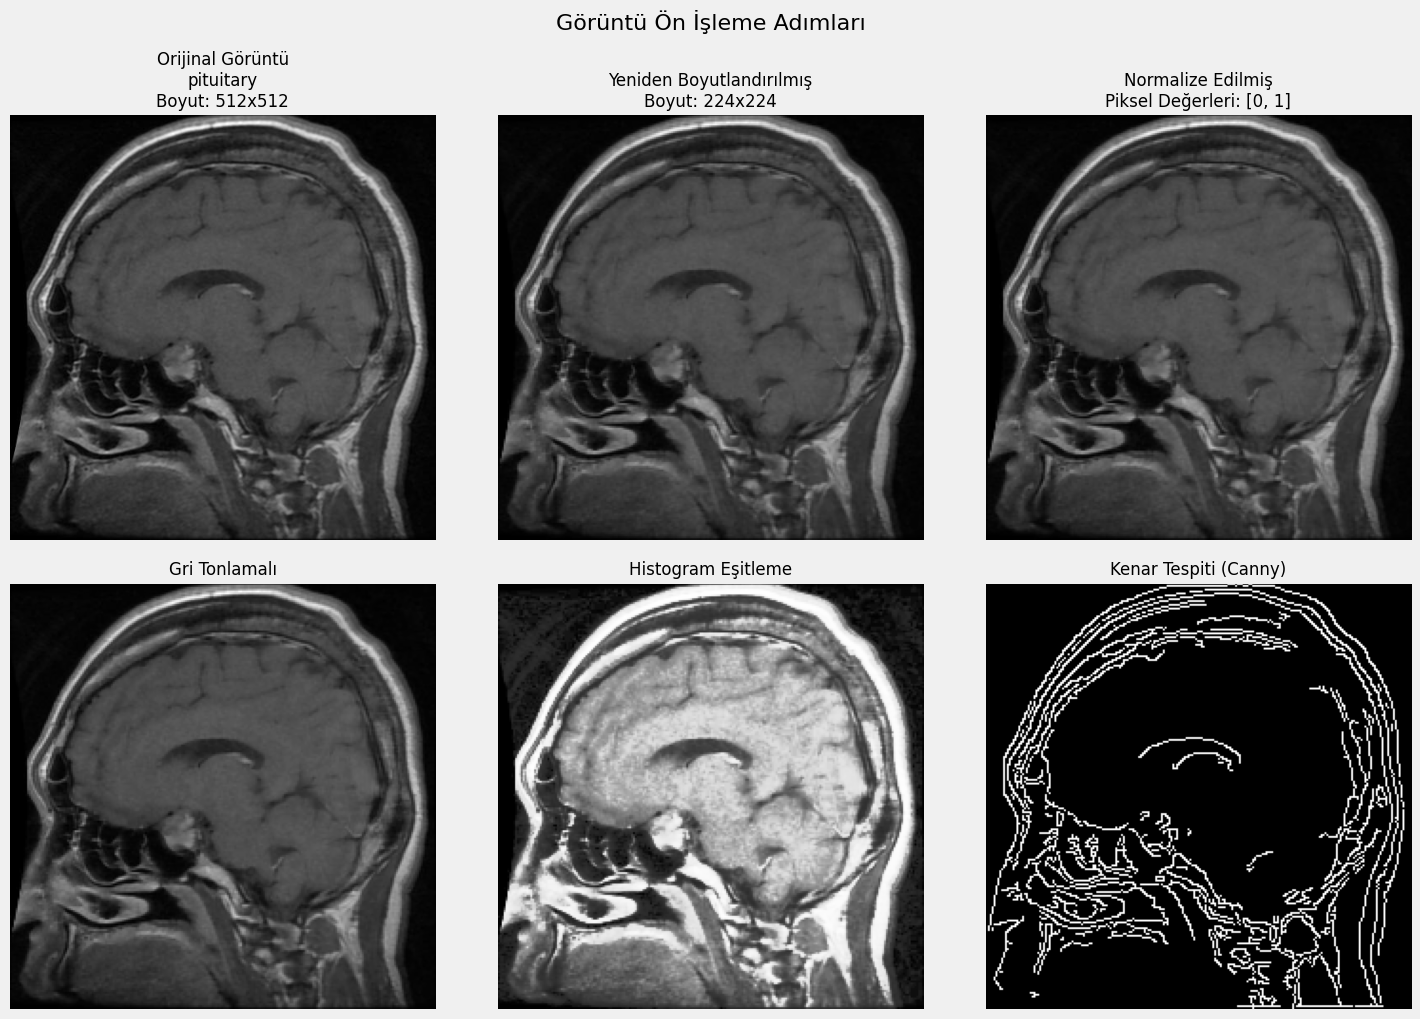

In [7]:
# Görüntü ön işleme adımlarını gösterme fonksiyonu
def show_preprocessing_steps(data_dir, split='Training'):
    split_dir = data_dir / split
    class_dirs = sorted([d for d in split_dir.iterdir() if d.is_dir()])
    
    # Rastgele bir sınıf seçme
    class_dir = random.choice(class_dirs)
    class_name = class_dir.name
    
    # Rastgele bir görüntü seçme
    img_path = random.choice(list(class_dir.glob('*.jpg')))
    
    # Görüntüyü okuma
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Görüntü ön işleme adımları
    # 1. Yeniden boyutlandırma
    img_resized = cv2.resize(img, (224, 224))
    
    # 2. Gri tonlamalı dönüşüm
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
    
    # 3. Histogram eşitleme
    img_eq = cv2.equalizeHist(img_gray)
    
    # 4. Gürültü azaltma
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    # 5. Kenar tespiti
    img_edges = cv2.Canny(img_gray, 100, 200)
    
    # 6. Normalize etme
    img_normalized = img_resized / 255.0
    
    # Ön işleme adımlarını gösterme
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Orijinal görüntü
    axes[0, 0].imshow(img)
    axes[0, 0].set_title(f'Orijinal Görüntü\n{class_name}\nBoyut: {img.shape[1]}x{img.shape[0]}', fontsize=12)
    axes[0, 0].axis('off')
    
    # Yeniden boyutlandırılmış görüntü
    axes[0, 1].imshow(img_resized)
    axes[0, 1].set_title(f'Yeniden Boyutlandırılmış\nBoyut: 224x224', fontsize=12)
    axes[0, 1].axis('off')
    
    # Normalize edilmiş görüntü
    axes[0, 2].imshow(img_normalized)
    axes[0, 2].set_title('Normalize Edilmiş\nPiksel Değerleri: [0, 1]', fontsize=12)
    axes[0, 2].axis('off')
    
    # Gri tonlamalı görüntü
    axes[1, 0].imshow(img_gray, cmap='gray')
    axes[1, 0].set_title('Gri Tonlamalı', fontsize=12)
    axes[1, 0].axis('off')
    
    # Histogram eşitlenmiş görüntü
    axes[1, 1].imshow(img_eq, cmap='gray')
    axes[1, 1].set_title('Histogram Eşitleme', fontsize=12)
    axes[1, 1].axis('off')
    
    # Kenar tespiti
    axes[1, 2].imshow(img_edges, cmap='gray')
    axes[1, 2].set_title('Kenar Tespiti (Canny)', fontsize=12)
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Görüntü Ön İşleme Adımları', fontsize=16, y=1.02)
    plt.show()

# Görüntü ön işleme adımlarını gösterme
print("\nGörüntü ön işleme adımları:")
show_preprocessing_steps(data_dir, split='Training')

## Özet

In [8]:
print("\nBu notebook, veri setindeki beyin tümörü MRI görüntülerini göstermektedir.")
print("Veri seti 4 sınıf içermektedir: glioma, meningioma, notumor ve pituitary.")
print("Görüntüler üzerinde çeşitli ön işleme ve veri artırma teknikleri gösterilmiştir.")


Bu notebook, veri setindeki beyin tümörü MRI görüntülerini göstermektedir.
Veri seti 4 sınıf içermektedir: glioma, meningioma, notumor ve pituitary.
Görüntüler üzerinde çeşitli ön işleme ve veri artırma teknikleri gösterilmiştir.
